In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 848.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00





In [ ]:
# Imports
from ultralytics import YOLO
import os
import shutil
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Baixando o dataset
!curl -L "https://app.roboflow.com/ds/9LeiKwZ9Ri?key=Yu1J8Z6Z56" -o roboflow.zip
!unzip roboflow.zip -d dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2852      0 --:--:-- --:--:-- --:--:--  2857
100  171M  100  171M    0     0  58.1M      0  0:00:02  0:00:02 --:--:-- 83.3M
Archive:  roboflow.zip
  inflating: dataset/README.dataset.txt  
  inflating: dataset/README.roboflow.txt  
  inflating: dataset/data.yaml       
   creating: dataset/train/
   creating: dataset/train/images/
 extracting: dataset/train/images/-1x-1_jpg.rf.3bf9ca7cd09387ec31f28b21a7299431.jpg  
 extracting: dataset/train/images/-1x-1_jpg.rf.3ee1cdbe11622d478c0a84c430cf45cc.jpg  
 extracting: dataset/train/images/-1x-1_jpg.rf.c4777d35895a583691306e90c1eb3c75.jpg  
 extracting: dataset/train/images/-november-victims-in-massive-floods-at-bang-khae-district-bangkok-1523081813_jpg.rf.098fc2d1629813e226e29a391130e4a5.jpg  
 extracting: dataset/train/images/-november-victims-in-massi

In [ ]:
# Caminhos das imagens e anotações
img_dir = 'dataset/train/images'
lbl_dir = 'dataset/train/labels'

img_files = sorted(glob(f'{img_dir}/*.jpg'))
lbl_files = sorted(glob(f'{lbl_dir}/*.txt'))

# Separar o conjunto em treino, validação e teste (70/15/15)
img_train, img_temp, lbl_train, lbl_temp = train_test_split(img_files, lbl_files, test_size=0.3, random_state=42)
img_val, img_test, lbl_val, lbl_test = train_test_split(img_temp, lbl_temp, test_size=0.5, random_state=42)

In [ ]:
import os
import shutil

# Função segura para copiar arquivos
def organizar(dset, imgs, lbls):
    os.makedirs(f'dataset/{dset}/images', exist_ok=True)
    os.makedirs(f'dataset/{dset}/labels', exist_ok=True)

    for img, lbl in zip(imgs, lbls):
        img_dst = f'dataset/{dset}/images/{os.path.basename(img)}'
        lbl_dst = f'dataset/{dset}/labels/{os.path.basename(lbl)}'

        if img != img_dst:
            shutil.copy(img, img_dst)
        if lbl != lbl_dst:
            shutil.copy(lbl, lbl_dst)

# Apenas organizar val e test
organizar('val', img_val, lbl_val)
organizar('test', img_test, lbl_test)

In [ ]:
# CLASSES
classes = ['people', 'rescuer']

# Gerar YAML de configuração
yaml_content = f"""
path: dataset
train: train
val: val
test: test
names: {classes}
"""

with open('dataset/data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
# Treinar modelo YOLOv8
model = YOLO('yolov8n.pt')

model.train(
    data='dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8-desastre-v1.01'
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 96.1MB/s]


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-desastre-v1.01, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 111MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1970.9±527.6 MB/s, size: 72.9 KB)


train: Scanning /content/dataset/train/labels... 2403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2403/2403 [00:00<00:00, 2433.06it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1178.2±802.8 MB/s, size: 65.7 KB)


val: Scanning /content/dataset/val/labels... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 1233.66it/s]


val: New cache created: /content/dataset/val/labels.cache
Plotting labels to runs/detect/yolov8-desastre-v1.01/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8-desastre-v1.01
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.26G      1.864      2.456      1.493         12        640: 100%|██████████| 151/151 [00:46<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.66it/s]

                   all        360       1004      0.351      0.347      0.291      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.66G      1.864      2.101      1.547          9        640: 100%|██████████| 151/151 [00:42<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        360       1004      0.366      0.471      0.369      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.68G      1.887      2.006      1.582         14        640: 100%|██████████| 151/151 [00:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]


                   all        360       1004      0.467      0.465      0.441      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.7G      1.872      1.916      1.585         10        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        360       1004      0.518      0.531      0.512      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.71G      1.844      1.801      1.556          7        640: 100%|██████████| 151/151 [00:41<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        360       1004      0.507      0.567       0.51      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.73G      1.833      1.785      1.558         11        640: 100%|██████████| 151/151 [00:41<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        360       1004      0.639       0.48      0.568       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.74G      1.807      1.738       1.54         16        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]

                   all        360       1004      0.649       0.58      0.601      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.77G      1.766       1.66      1.492         14        640: 100%|██████████| 151/151 [00:41<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]

                   all        360       1004      0.703      0.637      0.702      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.79G      1.744      1.638      1.484         20        640: 100%|██████████| 151/151 [00:40<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]

                   all        360       1004      0.642      0.667      0.696      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.8G      1.737      1.607      1.486         12        640: 100%|██████████| 151/151 [00:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]

                   all        360       1004      0.713      0.668      0.716      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.81G      1.727      1.587      1.474         14        640: 100%|██████████| 151/151 [00:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

                   all        360       1004      0.706      0.639      0.715      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.83G      1.703      1.518      1.453         17        640: 100%|██████████| 151/151 [00:41<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        360       1004       0.68      0.725      0.774      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.85G       1.68      1.499      1.445         13        640: 100%|██████████| 151/151 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        360       1004      0.707      0.725      0.776      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.87G       1.68      1.475      1.432         22        640: 100%|██████████| 151/151 [00:41<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        360       1004      0.749      0.733      0.804      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.88G      1.649      1.446      1.431         16        640: 100%|██████████| 151/151 [00:42<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        360       1004      0.683      0.693      0.749      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.9G       1.65      1.436      1.425         12        640: 100%|██████████| 151/151 [00:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]

                   all        360       1004      0.751      0.772      0.839      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.92G      1.617        1.4      1.409         20        640: 100%|██████████| 151/151 [00:41<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]


                   all        360       1004      0.764      0.771      0.826      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.94G      1.624      1.369      1.413          6        640: 100%|██████████| 151/151 [00:40<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        360       1004      0.811      0.783      0.849      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.95G      1.601      1.351      1.397         12        640: 100%|██████████| 151/151 [00:41<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        360       1004      0.782      0.824      0.855      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.97G      1.572      1.323      1.378         17        640: 100%|██████████| 151/151 [00:41<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        360       1004      0.826      0.825      0.874      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.99G      1.548      1.271      1.369         14        640: 100%|██████████| 151/151 [00:42<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]

                   all        360       1004      0.851      0.817      0.888       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.01G      1.555      1.269      1.367          7        640: 100%|██████████| 151/151 [00:42<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]


                   all        360       1004      0.837      0.844      0.901      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.01G      1.541      1.229      1.367          7        640: 100%|██████████| 151/151 [00:40<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        360       1004      0.841      0.842        0.9        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.04G      1.529      1.219      1.351          8        640: 100%|██████████| 151/151 [00:41<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]

                   all        360       1004      0.837      0.833      0.909      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.06G      1.505      1.213      1.336          7        640: 100%|██████████| 151/151 [00:41<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all        360       1004      0.885       0.87      0.935       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.07G      1.506      1.171      1.331         26        640: 100%|██████████| 151/151 [00:41<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        360       1004      0.883      0.896      0.942      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.08G      1.478      1.148      1.332         17        640: 100%|██████████| 151/151 [00:41<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]


                   all        360       1004      0.892      0.869      0.938      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.11G      1.465      1.133      1.314          6        640: 100%|██████████| 151/151 [00:41<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        360       1004      0.889      0.891      0.948       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.13G      1.456      1.117      1.308         11        640: 100%|██████████| 151/151 [00:41<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        360       1004      0.893      0.889      0.943      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.14G      1.437      1.092      1.295         10        640: 100%|██████████| 151/151 [00:41<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        360       1004      0.914        0.9      0.955      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.15G      1.406      1.049       1.28         12        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]

                   all        360       1004      0.907      0.888      0.953       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.18G      1.401      1.043      1.281         17        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        360       1004      0.916      0.913      0.961      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.2G      1.403       1.02      1.282         12        640: 100%|██████████| 151/151 [00:41<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        360       1004      0.907      0.905      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.21G      1.369     0.9887      1.261         11        640: 100%|██████████| 151/151 [00:42<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]

                   all        360       1004      0.923      0.916      0.966      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.22G      1.358     0.9956      1.256         17        640: 100%|██████████| 151/151 [00:42<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]

                   all        360       1004      0.925      0.944      0.973      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.24G       1.35     0.9725      1.253          9        640: 100%|██████████| 151/151 [00:41<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]


                   all        360       1004      0.925      0.932      0.967      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.26G      1.337     0.9658      1.243          9        640: 100%|██████████| 151/151 [00:41<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]

                   all        360       1004      0.937      0.951      0.973      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.28G      1.303     0.9338      1.224         30        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

                   all        360       1004      0.932      0.939      0.973      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.29G      1.312     0.9236      1.223         14        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]

                   all        360       1004      0.926      0.929      0.972      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.31G      1.298     0.9187      1.221         18        640: 100%|██████████| 151/151 [00:41<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

                   all        360       1004      0.949      0.945       0.98      0.676


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.33G      1.199     0.7572      1.178          9        640: 100%|██████████| 151/151 [00:41<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]


                   all        360       1004      0.947       0.94      0.979      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.35G       1.16     0.7073      1.155          4        640: 100%|██████████| 151/151 [00:38<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        360       1004      0.956      0.938      0.981      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.35G      1.126     0.6848       1.14          5        640: 100%|██████████| 151/151 [00:38<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]


                   all        360       1004      0.963      0.947      0.985      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.38G      1.123     0.6705      1.133          9        640: 100%|██████████| 151/151 [00:38<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]

                   all        360       1004      0.967      0.954      0.987      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.4G      1.087     0.6536      1.117          6        640: 100%|██████████| 151/151 [00:38<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]


                   all        360       1004      0.953      0.959      0.985      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.41G      1.064     0.6437      1.107          7        640: 100%|██████████| 151/151 [00:38<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.83it/s]


                   all        360       1004      0.965      0.958      0.988      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.42G      1.052     0.6265      1.099          7        640: 100%|██████████| 151/151 [00:38<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]

                   all        360       1004      0.965      0.964      0.987      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.45G      1.025     0.6146      1.085          6        640: 100%|██████████| 151/151 [00:37<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        360       1004      0.967      0.959      0.988      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.47G      1.015     0.6038      1.078          8        640: 100%|██████████| 151/151 [00:37<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        360       1004      0.967      0.966      0.988      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.48G      1.003     0.5992      1.072          9        640: 100%|██████████| 151/151 [00:37<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        360       1004       0.97       0.96      0.989      0.762



50 epochs completed in 0.627 hours.
Optimizer stripped from runs/detect/yolov8-desastre-v1.01/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8-desastre-v1.01/weights/best.pt, 6.2MB

Validating runs/detect/yolov8-desastre-v1.01/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]


                   all        360       1004       0.97       0.96      0.989      0.762
                people        265        675      0.967      0.932      0.985      0.732
               rescuer        129        329      0.972      0.988      0.993      0.791
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/yolov8-desastre-v1.01


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bda2b3be0d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Avaliação no conjunto de teste
metrics = model.val(data='dataset/data.yaml', split='test')
print(metrics.mean_results())  # mostra média das métricas

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1302.5±281.3 MB/s, size: 66.4 KB)


val: Scanning /content/dataset/test/labels... 361 images, 0 backgrounds, 0 corrupt: 100%|██████████| 361/361 [00:00<00:00, 2483.05it/s]

val: New cache created: /content/dataset/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.68it/s]


                   all        361        893      0.952      0.956      0.986       0.76
                people        274        639      0.939      0.944      0.983      0.735
               rescuer        114        254      0.965      0.969      0.989      0.785
Speed: 0.9ms preprocess, 6.4ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/yolov8-desastre-v1.012
[np.float64(0.952025189135714), np.float64(0.9560829544194299), np.float64(0.9856725773662378), np.float64(0.7601066617364104)]


In [ ]:
# Copiar modelo final
best_model_path = 'runs/detect/yolov8-desastre-v1.01/weights/best.pt'

# Baixar modelo
from google.colab import files
files.download(best_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Avaliando o desempenho - Usando imagens do dataset/test/imagens



image 1/1 /content/dataset/test/images/1293_jpg.rf.9260b7c5793e39c04c0fb2634ab5988d.jpg: 640x640 2 peoples, 3 rescuers, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


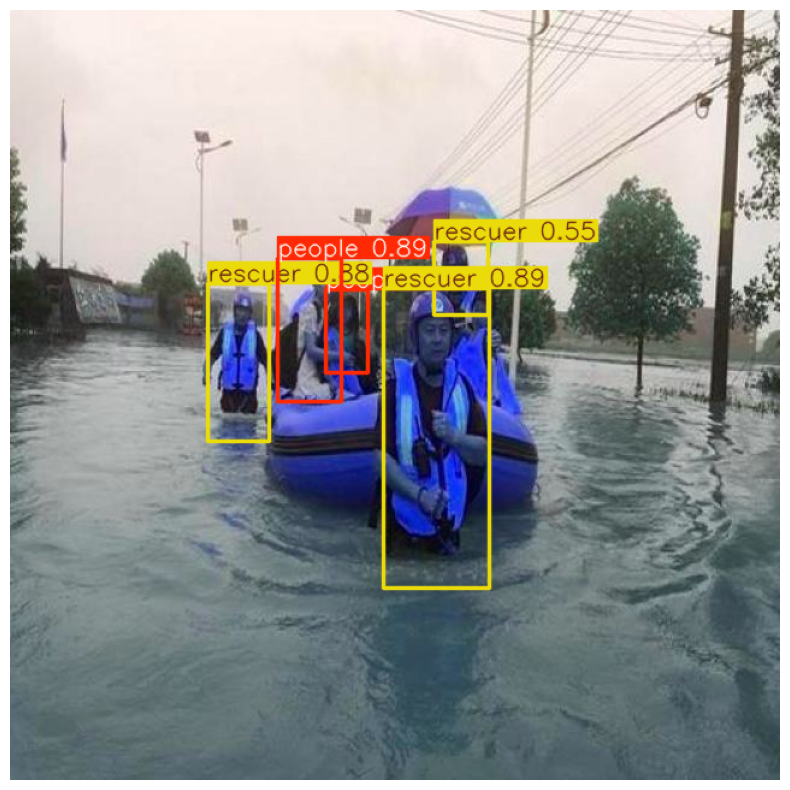


image 1/1 /content/dataset/test/images/India-floods-940x580_jpg.rf.84e97486fe65c8d2be0b40ea9f92766c.jpg: 640x640 13 peoples, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


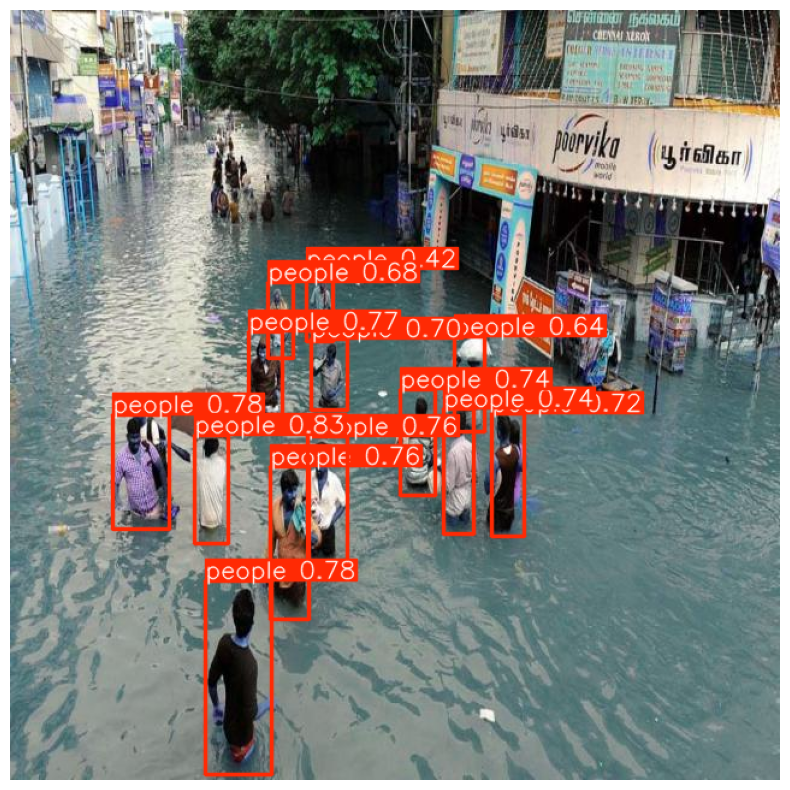


image 1/1 /content/dataset/test/images/flood-india-1000x600_jpg.rf.bfdcd33ee5145928db3d3dc9f039b45f.jpg: 640x640 10 peoples, 17.2ms
Speed: 7.3ms preprocess, 17.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


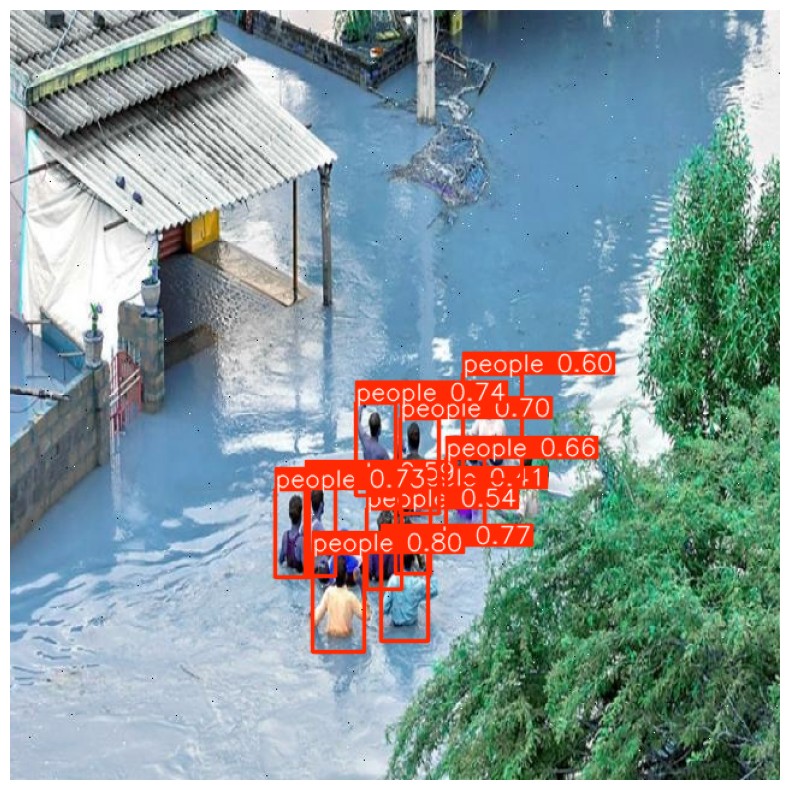


image 1/1 /content/dataset/test/images/1661_jpg.rf.44920031acc040250aff313612a95a40.jpg: 640x640 1 people, 1 rescuer, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)


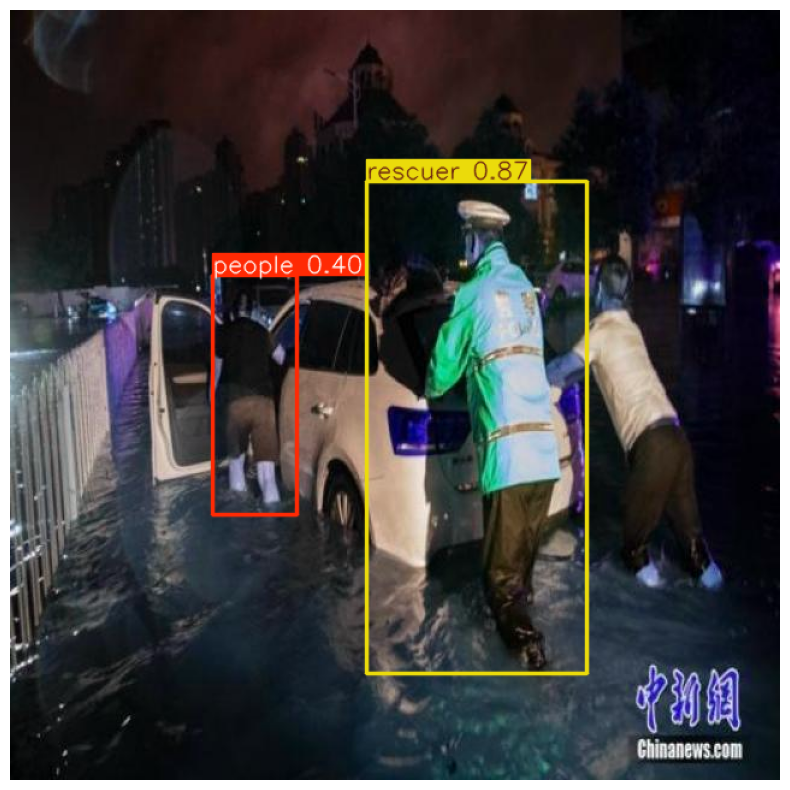


image 1/1 /content/dataset/test/images/ph_17939_63491_jpg.rf.d5caf411d0ae47b330af3ef2eda756df.jpg: 640x640 1 people, 10.4ms
Speed: 5.8ms preprocess, 10.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


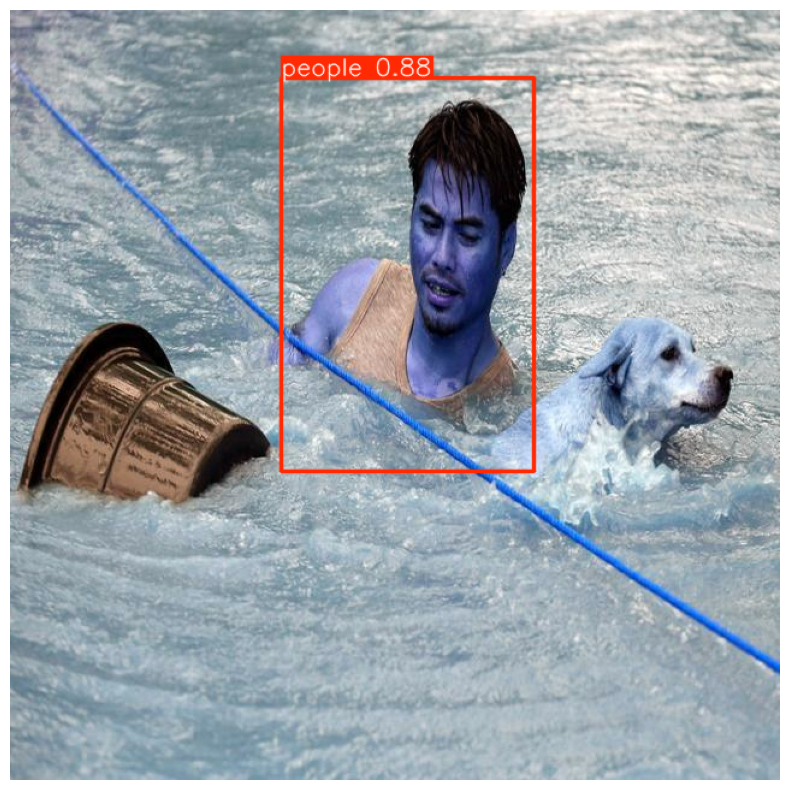

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from glob import glob
import random

# Carregar o modelo treinado
model = YOLO('runs/detect/yolov8-desastre-v1.01/weights/best.pt')

test_imgs = glob('dataset/test/images/*.jpg')

# Selecionar 5 imagens aleatórias
random_imgs = random.sample(test_imgs, 5)

# Visualizar as detecções
for img_path in random_imgs:
    results = model(img_path, conf=0.3)
    img_annotated = results[0].plot()

    plt.figure(figsize=(10, 10))
    plt.imshow(img_annotated)
    plt.axis('off')
    plt.show()


In [ ]:
model.predict(source='dataset/test/images', save=True, conf=0.3)


image 1/361 /content/dataset/test/images/09649319_jpg.rf.2e75c4e7d269dbbb233b053e257cccb1.jpg: 640x640 3 peoples, 9.8ms
image 2/361 /content/dataset/test/images/1004_jpg.rf.9cd815cd4febb612371a4ad299b3ba5a.jpg: 640x640 2 rescuers, 7.4ms
image 3/361 /content/dataset/test/images/1004_jpg.rf.f95421947db4b38aea1927ecd479352d.jpg: 640x640 2 rescuers, 7.4ms
image 4/361 /content/dataset/test/images/100_jpg.rf.64548626b258fa32a24e493cb428edea.jpg: 640x640 1 people, 7.4ms
image 5/361 /content/dataset/test/images/1040_jpg.rf.e97660904043bdc8e7d62f502afd13db.jpg: 640x640 2 peoples, 7.4ms
image 6/361 /content/dataset/test/images/1046_jpg.rf.3c8747e2d980206acb0e5b7f944606d1.jpg: 640x640 3 peoples, 7.4ms
image 7/361 /content/dataset/test/images/1051_jpg.rf.c7dd62616de1cd09c1461eee16fd3708.jpg: 640x640 3 peoples, 7.3ms
image 8/361 /content/dataset/test/images/1062_jpg.rf.fcc41a1f54d9434194250c5bc71a4c7f.jpg: 640x640 1 people, 7.4ms
image 9/361 /content/dataset/test/images/1063_jpg.rf.decf09b70b76e60

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'people', 1: 'rescuer'}
 obb: None
 orig_img: array([[[ 65,  64,  68],
         [ 79,  78,  82],
         [ 94,  93,  95],
         ...,
         [ 18,  37,  50],
         [ 19,  38,  51],
         [ 20,  39,  52]],
 
        [[ 74,  73,  77],
         [ 87,  86,  90],
         [100,  99, 101],
         ...,
         [ 20,  39,  52],
         [ 20,  39,  52],
         [ 21,  40,  53]],
 
        [[ 98,  97,  99],
         [107, 106, 108],
         [119, 116, 118],
         ...,
         [ 22,  41,  54],
         [ 22,  41,  54],
         [ 22,  41,  54]],
 
        ...,
 
        [[ 98, 100, 100],
         [ 98, 100, 100],
         [ 99, 101, 101],
         ...,
         [ 99, 111, 117],
         [101, 113, 119],
         [102, 114, 120]],
 
        [[ 98, 100, 100],
         [ 98, 100, 100],
         [ 99, 101, 101],
         ...,
    

Resultados

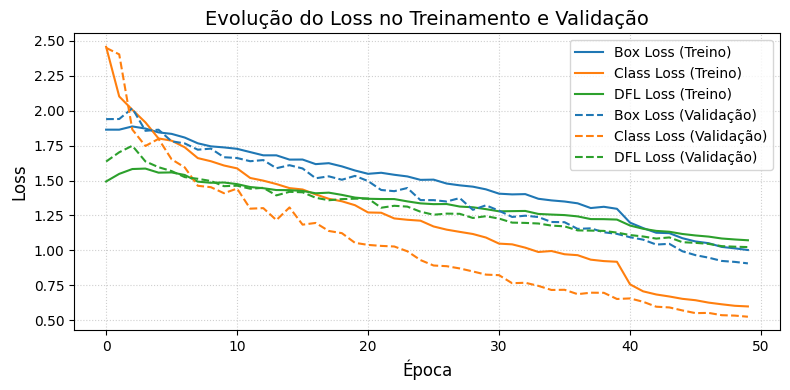

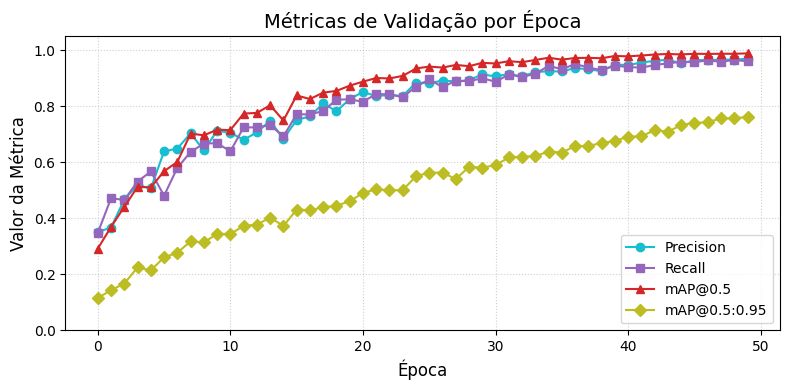

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os resultados do YOLO
df = pd.read_csv('runs/detect/yolov8-desastre-v1.01/results.csv')

# ----------------------------
# 1. LOSS: Treino vs Validação
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(df['train/box_loss'], label='Box Loss (Treino)', color='tab:blue')
plt.plot(df['train/cls_loss'], label='Class Loss (Treino)', color='tab:orange')
plt.plot(df['train/dfl_loss'], label='DFL Loss (Treino)', color='tab:green')

plt.plot(df['val/box_loss'], label='Box Loss (Validação)', linestyle='--', color='tab:blue')
plt.plot(df['val/cls_loss'], label='Class Loss (Validação)', linestyle='--', color='tab:orange')
plt.plot(df['val/dfl_loss'], label='DFL Loss (Validação)', linestyle='--', color='tab:green')

plt.title('Evolução do Loss no Treinamento e Validação', fontsize=14)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# ----------------------------
# 2. Métricas de Validação
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(df['metrics/precision(B)'], label='Precision', color='tab:cyan', marker='o')
plt.plot(df['metrics/recall(B)'], label='Recall', color='tab:purple', marker='s')
plt.plot(df['metrics/mAP50(B)'], label='mAP@0.5', color='tab:red', marker='^')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='tab:olive', marker='D')

plt.title('Métricas de Validação por Época', fontsize=14)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Valor da Métrica', fontsize=12)
plt.ylim(0, 1.05)  # Métricas vão de 0 a 1
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


- Precision	% de detecções corretas (sem falsos positivos)
- Recall	% de objetos reais detectados (sem falsos negativos)
- mAP@0.5	Média da acurácia com 50% de sobreposição (IoU)
- mAP@0.5:0.95	Mais rigoroso; mede desempenho com IoU de 0.5 a 0.95

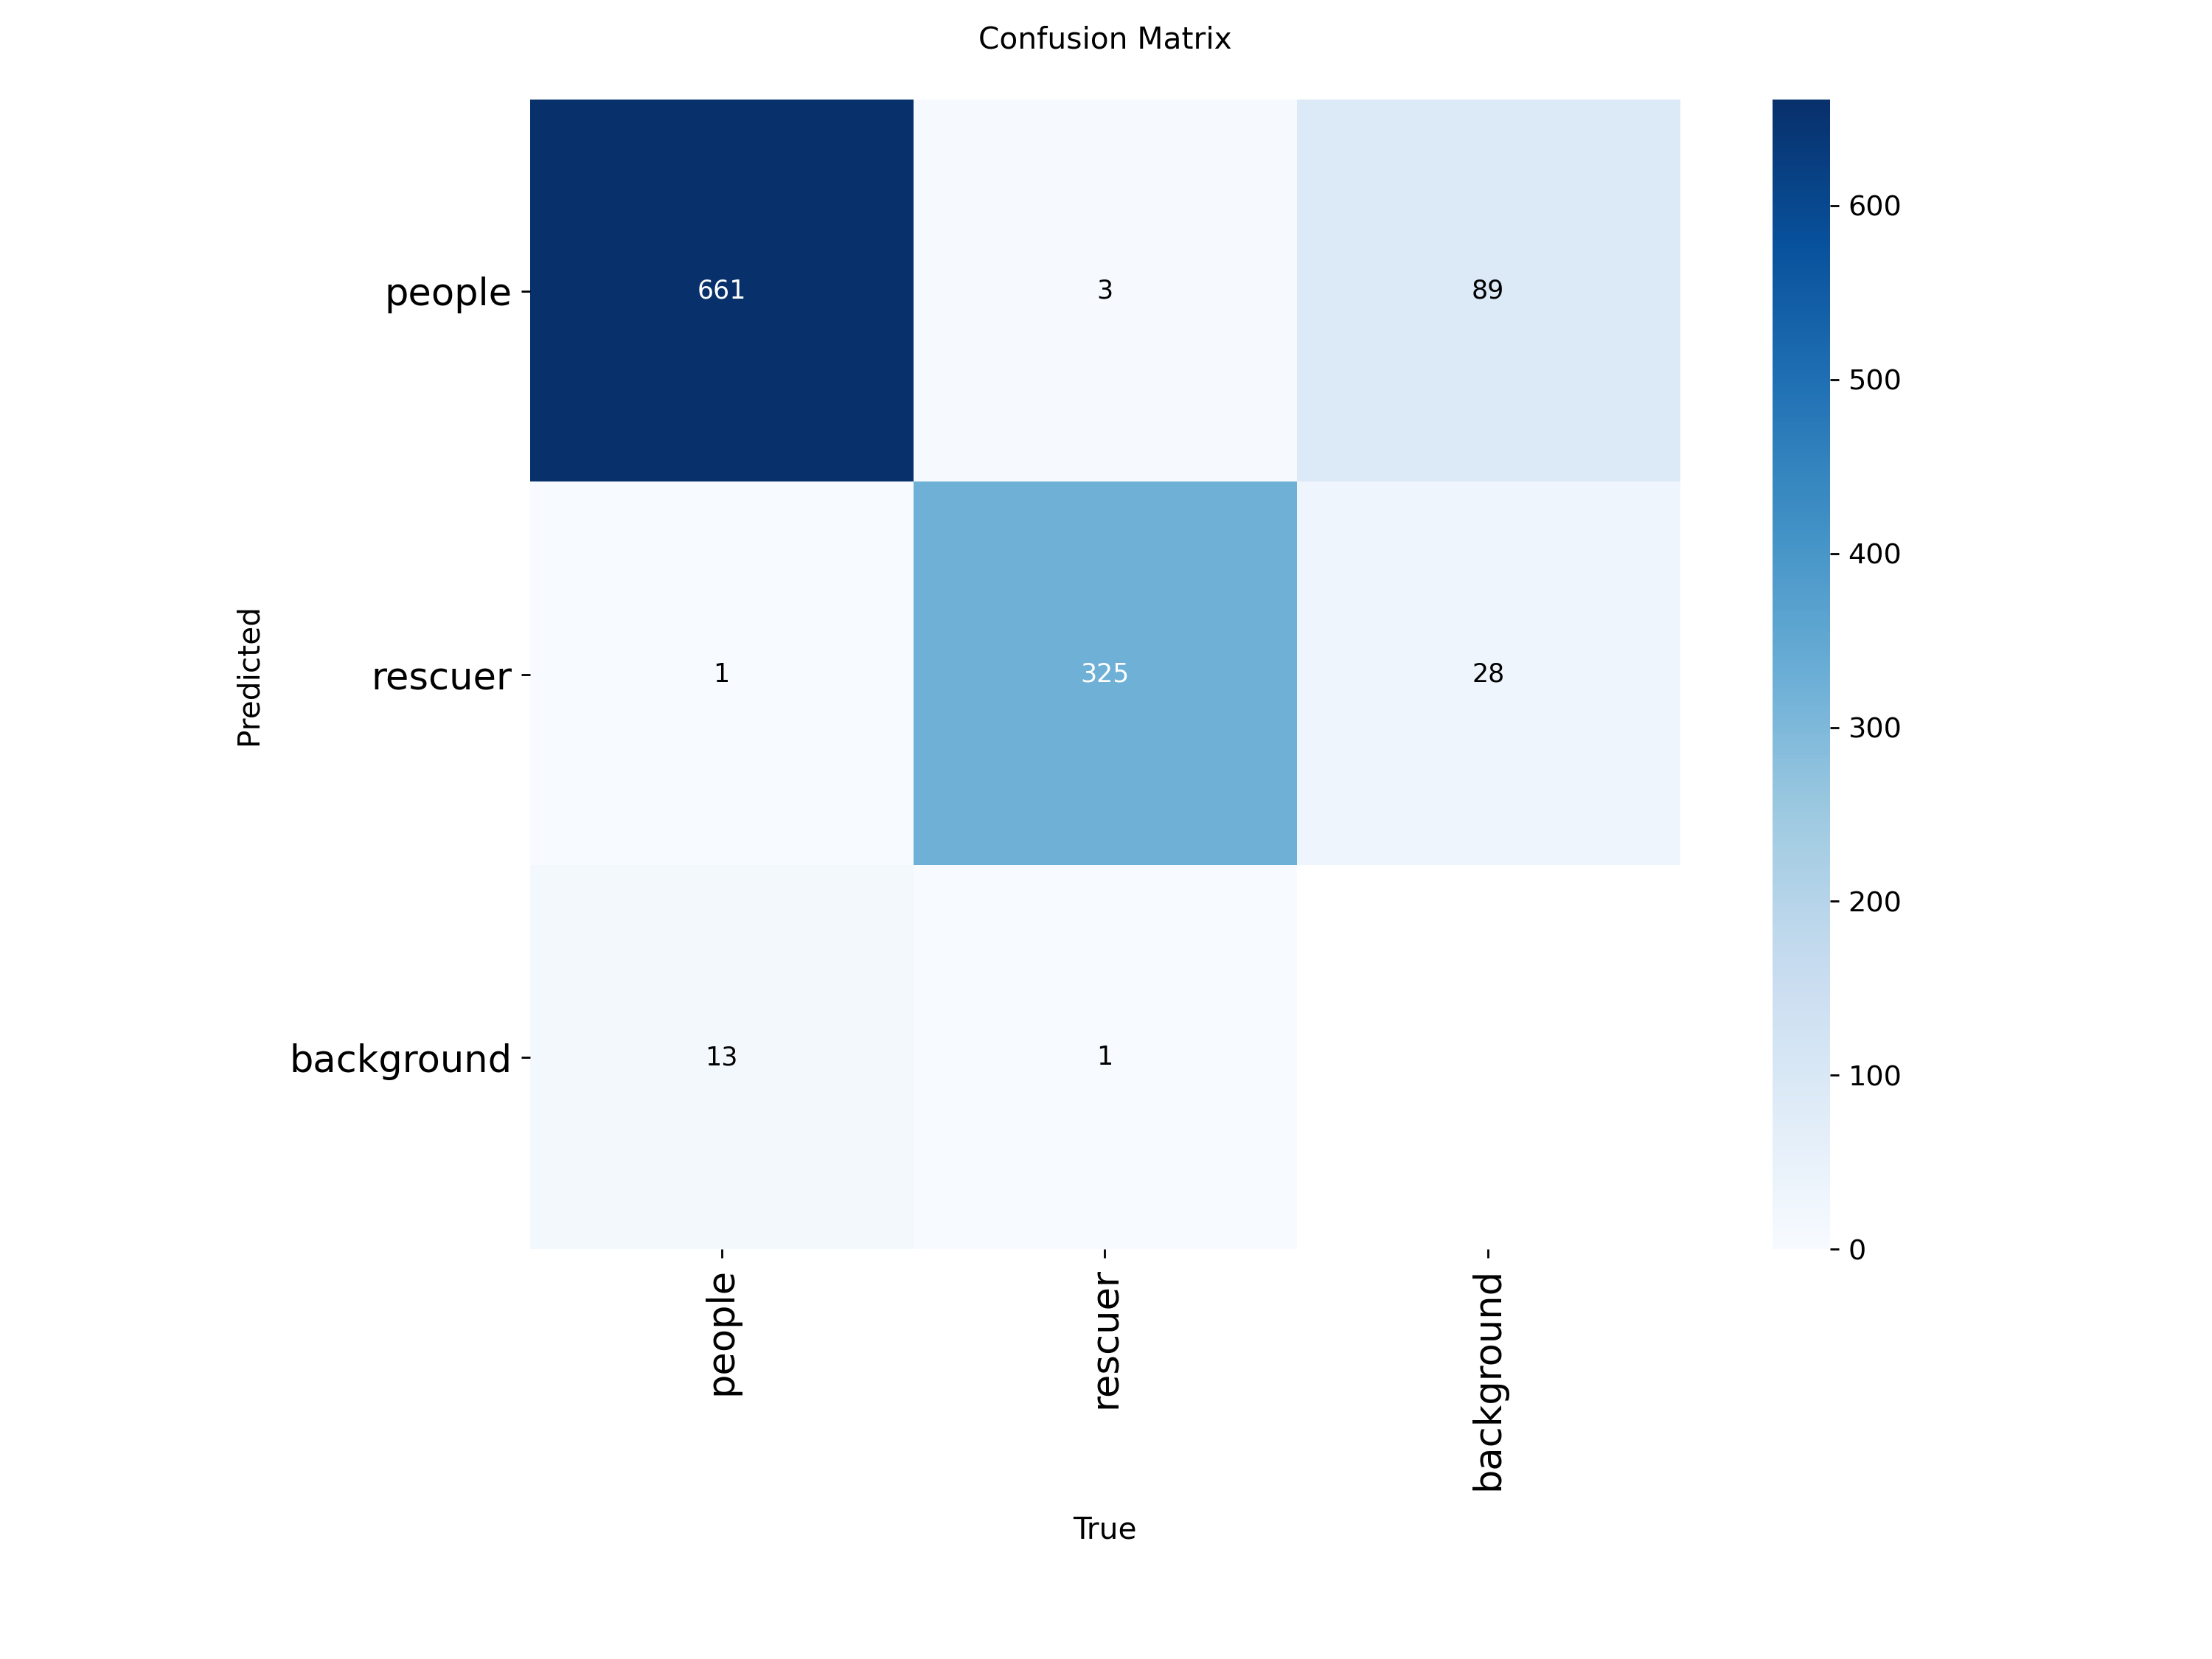

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/yolov8-desastre-v1.01/confusion_matrix.png', width=800))


### Avaliando o modelo com imagens fora do treino


image 1/1 /content/06110059_2130298_GD.jpg: 384x640 4 rescuers, 78.3ms
Speed: 10.1ms preprocess, 78.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


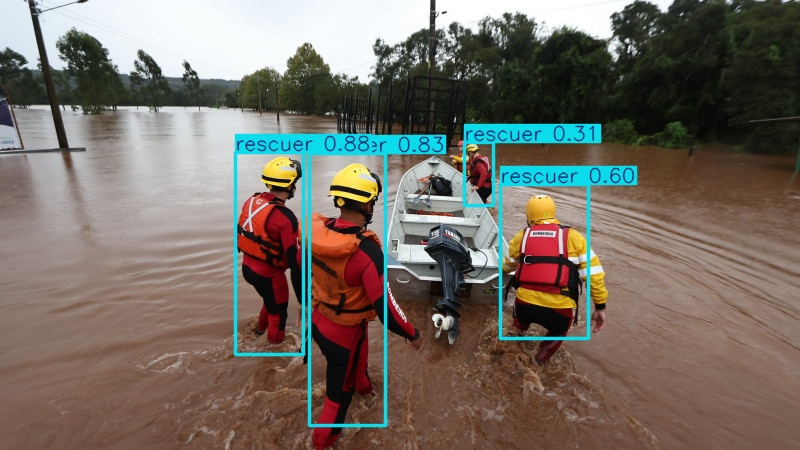

In [ ]:
from PIL import Image
from IPython.display import display

img = '/content/06110059_2130298_GD.jpg'
results = model(img, conf=0.3)
results[0].save('saida_enchentes1.jpg')
display(Image.open('saida_enchentes1.jpg'))

#img = '/content/drive/MyDrive/enchentes2.jpg'
#results = model(img, conf=0.3)
#results[0].save('saida_enchentes2.jpg')
#display(Image.open('saida_enchentes2.jpg'))

#img = '/content/drive/MyDrive/enchentes3.jpg'
#results = model(img, conf=0.3)
#results[0].save('saida_enchentes3.jpg')
#display(Image.open('saida_enchentes3.jpg'))

## Detecção de pessoas em vídeo

In [ ]:
import cv2
from ultralytics import YOLO

# Carrega o modelo treinado
model = YOLO("/content/drive/MyDrive/best.pt")

# Caminho do vídeo de entrada
video_path = "https://drive.google.com/file/d/1z67doEL0J1wf6AhU3bIl3WeL4o0PqExt/view"
cap = cv2.VideoCapture(video_path)

# Informações do vídeo
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# Criar vídeo de saída
out = cv2.VideoWriter("saida_detectada.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detecção
    results = model(frame, conf=0.3)

    # Desenhar resultados
    result_img = results[0].plot()  # imagem com bounding boxes

    out.write(result_img)  # salvar no vídeo

cap.release()
out.release()

In [ ]:
# Salvar no Google Drive
import shutil

shutil.move("saida_detectada.mp4", "/content/drive/MyDrive/saida_detectada.mp4")

'/content/drive/MyDrive/saida_detectada.mp4'